In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
athlete_events = pd.read_csv('athlete_events.csv')

In [3]:
athlete_events.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
filter_data = athlete_events[["Sex", "Age", "Height", "Weight", "Team", "Year", "Season", "Sport", "Event", "Medal"]]

In [5]:
filter_data = filter_data.dropna().reset_index(drop = True)
filter_data.head()

,Sex,Age,Height,Weight,Team,Year,Season,Sport,Event,Medal
0,M,28.0,184.0,85.0,Finland,2014,Winter,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
1,M,28.0,175.0,64.0,Finland,1948,Summer,Gymnastics,Gymnastics Men's Individual All-Around,Bronze
2,M,28.0,175.0,64.0,Finland,1948,Summer,Gymnastics,Gymnastics Men's Team All-Around,Gold
3,M,28.0,175.0,64.0,Finland,1948,Summer,Gymnastics,Gymnastics Men's Horse Vault,Gold
4,M,28.0,175.0,64.0,Finland,1948,Summer,Gymnastics,Gymnastics Men's Pommelled Horse,Gold


In [6]:
winter_data = filter_data[filter_data["Season"] == "Winter"]
winter_data.head()

,Sex,Age,Height,Weight,Team,Year,Season,Sport,Event,Medal
0,M,28.0,184.0,85.0,Finland,2014,Winter,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
6,M,20.0,176.0,85.0,Norway,1992,Winter,Alpine Skiing,Alpine Skiing Men's Super G,Gold
7,M,20.0,176.0,85.0,Norway,1992,Winter,Alpine Skiing,Alpine Skiing Men's Giant Slalom,Bronze
8,M,22.0,176.0,85.0,Norway,1994,Winter,Alpine Skiing,Alpine Skiing Men's Downhill,Silver
9,M,22.0,176.0,85.0,Norway,1994,Winter,Alpine Skiing,Alpine Skiing Men's Super G,Bronze


In [7]:
summer_data = filter_data[(filter_data["Season"] == "Summer")]
summer_data.head()



,Sex,Age,Height,Weight,Team,Year,Season,Sport,Event,Medal
1,M,28.0,175.0,64.0,Finland,1948,Summer,Gymnastics,Gymnastics Men's Individual All-Around,Bronze
2,M,28.0,175.0,64.0,Finland,1948,Summer,Gymnastics,Gymnastics Men's Team All-Around,Gold
3,M,28.0,175.0,64.0,Finland,1948,Summer,Gymnastics,Gymnastics Men's Horse Vault,Gold
4,M,28.0,175.0,64.0,Finland,1948,Summer,Gymnastics,Gymnastics Men's Pommelled Horse,Gold
5,M,32.0,175.0,64.0,Finland,1952,Summer,Gymnastics,Gymnastics Men's Team All-Around,Bronze


In [8]:
summer_data["Sport"].unique()

array(['Gymnastics', 'Rowing', 'Football', 'Fencing', 'Taekwondo',
       'Athletics', 'Canoeing', 'Handball', 'Water Polo', 'Wrestling',
       'Sailing', 'Cycling', 'Hockey', 'Softball', 'Swimming', 'Boxing',
       'Basketball', 'Diving', 'Baseball', 'Volleyball',
       'Modern Pentathlon', 'Judo', 'Rugby Sevens', 'Tennis',
       'Rhythmic Gymnastics', 'Weightlifting', 'Equestrianism',
       'Badminton', 'Beach Volleyball', 'Shooting',
       'Synchronized Swimming', 'Triathlon', 'Table Tennis', 'Rugby',
       'Archery', 'Tug-Of-War', 'Ice Hockey', 'Trampolining', 'Lacrosse',
       'Golf', 'Art Competitions', 'Figure Skating'], dtype=object)

test = summer_data[(summer_data["Sport"] == "Gymnastics") & (summer_data["Sex"] == "M")]
test

test_data = test[["Age", "Height", "Weight", "Medal"]]
test_data

test_data1 = pd.get_dummies(test_data)
test_data1 = test_data1.drop(columns =["Medal_Bronze", "Medal_Silver"])
test_data1

X = test_data1[['Height', "Weight", "Age"]]
print(X.shape)
y = test_data1['Medal_Gold']
print(y.shape)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

classifier.fit(X_train, y_train)

print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

predictions = classifier.predict(X_test)

pd.DataFrame({"Prediction": predictions, "Actual": y_test})

df = athlete_events[["Age", "Height", "Weight", "Medal"]]
df

In [9]:
athlete_events = athlete_events.dropna(subset=['Height', 'Weight', "Sex"])

In [10]:
df = athlete_events[["Age", "Height", "Weight", "Medal"]]


In [11]:
df = df.dropna(subset=['Height', 'Weight'])

In [12]:
#df = athlete_events[["Age", "Height", "Weight", "Medal"]]
df = df.replace("Gold", 1)
df = df.replace("Silver", 1)
df = df.replace("Bronze", 1)
df["Medal"] = df["Medal"].fillna(0)
df = df.dropna()


In [13]:
df["Medal"].unique()

array([0., 1.])

In [14]:


X = df[['Height', "Weight", "Age"]] 
print(X.shape) 
y = df['Medal'] 
print(y.shape)


(206165, 3)
(206165,)


In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [16]:
from sklearn.linear_model import LogisticRegression 
classifier = LogisticRegression() 
classifier

classifier.fit(X_train, y_train)

LogisticRegression()

In [17]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}") 
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

predictions = classifier.predict(X_test)

pd.DataFrame({"Prediction": predictions, "Actual": y_test})



Training Data Score: 0.8536763612140497
Testing Data Score: 0.8534011097745527


,Prediction,Actual
86131,0.0,1.0
205915,0.0,0.0
99569,0.0,0.0
222613,0.0,0.0
246331,0.0,0.0
...,...,...
254007,0.0,0.0
208127,0.0,0.0
129133,0.0,1.0
73985,0.0,1.0


# RandomForest

In [79]:
from sklearn import tree


In [80]:
df.head()

,Age,Height,Weight,Medal
0,24.0,180.0,80.0,0.0
1,23.0,170.0,60.0,0.0
4,21.0,185.0,82.0,0.0
5,21.0,185.0,82.0,0.0
6,25.0,185.0,82.0,0.0


In [81]:
target = df["Medal"]
target_names = ["Medals", "None"]

In [82]:
data = df.drop("Medal", axis=1)
feature_names = data.columns
data.head()

,Age,Height,Weight
0,24.0,180.0,80.0
1,23.0,170.0,60.0
4,21.0,185.0,82.0
5,21.0,185.0,82.0
6,25.0,185.0,82.0


In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [88]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8361724418920492

In [89]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.8389468782740289

In [90]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.4212766199724776, 'Weight'),
 (0.31523344909159656, 'Height'),
 (0.2634899309359258, 'Age')]

# KNN

In [91]:
from sklearn.neighbors import KNeighborsClassifier
df.head()

,Age,Height,Weight,Medal
0,24.0,180.0,80.0,0.0
1,23.0,170.0,60.0,0.0
4,21.0,185.0,82.0,0.0
5,21.0,185.0,82.0,0.0
6,25.0,185.0,82.0,0.0


In [92]:
y = df["Medal"]
target_names = ["Medals", "None"]

In [93]:
X = df.drop("Medal", axis=1)
X.head()

,Age,Height,Weight
0,24.0,180.0,80.0
1,23.0,170.0,60.0
4,21.0,185.0,82.0
5,21.0,185.0,82.0
6,25.0,185.0,82.0


In [99]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [100]:
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler().fit(X_train)

In [101]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

k: 11, Train/Test Score: 0.855/0.850
k: 17, Train/Test Score: 0.854/0.852
k: 23, Train/Test Score: 0.854/0.853
k: 29, Train/Test Score: 0.854/0.853
k: 35, Train/Test Score: 0.854/0.853
k: 41, Train/Test Score: 0.854/0.853


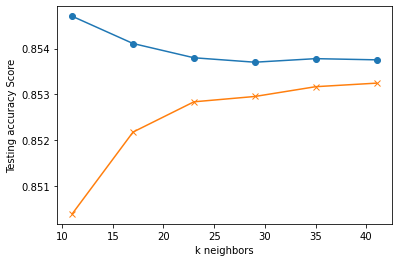

In [102]:
train_scores = []
test_scores = []
for k in range(11, 47, 6):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(11, 47, 6), train_scores, marker='o')
plt.plot(range(11, 47, 6), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [103]:
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train_scaled, y_train)
print('k=13 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=13 Test Acc: 0.851


# SVM

In [65]:
df1 = athlete_events[["Age", "Height", "Weight", "Medal"]]
df1 = df1.dropna()
df1 = df1.reset_index(drop = True)
df1.head()

,Age,Height,Weight,Medal
0,28.0,184.0,85.0,Bronze
1,28.0,175.0,64.0,Bronze
2,28.0,175.0,64.0,Gold
3,28.0,175.0,64.0,Gold
4,28.0,175.0,64.0,Gold


In [66]:
from sklearn.neighbors import KNeighborsClassifier

In [71]:
target = df1["Medal"]
target_names = ["Gold", "Silver", "Bronze"]

In [74]:
data = df1.drop("Medal", axis=1)
feature_names = data.columns
data.head()

,Age,Height,Weight
0,28.0,184.0,85.0
1,28.0,175.0,64.0
2,28.0,175.0,64.0
3,28.0,175.0,64.0
4,28.0,175.0,64.0


In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [ ]:
from sklearn.svm import SVC 
model = SVC(kernel='rbf')
model.fit(X_train, y_train)

In [ ]:
print('Test Acc: %.3f' % model.score(X_test, y_test))

In [78]:
from sklearn.metrics import classification_report
predictions = model.predict(X_test)
print(classification_report(y_test, predictions,
                            target_names=target_names))

C:\Users\onlyd\AppData\Local\Continuum\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

        Gold       0.35      0.51      0.42      2550
      Silver       0.35      0.53      0.43      2565
      Bronze       0.00      0.00      0.00      2431

    accuracy                           0.35      7546
   macro avg       0.24      0.35      0.28      7546
weighted avg       0.24      0.35      0.29      7546

